#Question 1 and 2 module to periodically scan the news and keep track parsed news

In [30]:
# Steps to webscrapping

# 1 - OPEN A VIRTUAL WEBCLIENT -> REQUEST THE PAGE AND OPEN THE URL
# 2 - GRABBING THE WEBPAGE & FETCH THE PAGE
# 3 - DUMP THE PAGE INTO VARIABLE & CLOSE THE VIRTUAL WEBCLIENT
# 4 - HTML PARSING & REVIEW
# 5 - TRAVERSE THE HTML
# 6 - GRAB THE DESIRED DATA
# 7 - FIND THE ATTRIBUTES
# 8 - RETREIVE DETAILS OF ATTRIBUTES
# 9 - SAVE INTO CSV

#Scenario: Scan a product page and retrieve details on the brand.
# Importing the required modules
import os
import sys
import pandas as pd
import re
import urllib
import csv
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# my_url = 'https://www.prnewswire.com/news-releases/news-releases-list/?month=03&day=28&year=2021&hour=00'
my_url = 'https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=07&year=2021&hour=00&page=1&pagesize=100'
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

UClient = uReq(urllib.request.Request(my_url, headers=hdr))
page = UClient.read()
UClient.close()
page_soup = soup(page, 'html.parser')
text_from_page = page_soup.get_text()

# coding=utf8
# the above tag defines encoding for this document and is for Python 2.x compatibility

regex = r"[A-Z]+\s*:\s*([A-Z]{2,})"
stock_symbol_postfix = []
stock_symbols = []
test_str = (text_from_page)

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    # print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))    
    stock_symbols.append(match.group())
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        if match.group(groupNum) not in stock_symbol_postfix:
          stock_symbol_postfix.append(match.group(groupNum))
        # print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))

# Note: for Python 2.7 compatibility, use ur"" to prefix the regex and u"" to prefix the test string and substitution.
print("Found stock symbols: ")
print(stock_symbols)
print(stock_symbol_postfix)


Found stock symbols: 
['NYSE: ASX', 'NASDAQ: MGI', 'NASDAQ: EBON', 'NYSE: GPX', 'NYSE: GPX', 'TSXV: VIPR', 'OTC:VIPRF', 'TSXV: VIPR', 'NEO: GRAM', 'OTCQX: GRAMF', 'PINK: GRMWF', 'BMV: CADU', 'NYSE: BLL', 'NYSE: NVST', 'NASD: IDCC', 'OTCQB:KAVL', 'OTCQB: KAVL', 'TSX: PPL', 'NYSE: PBA', 'NYSE: WFG', 'NYSE: RENN', 'NYSE: AMH', 'NYSE: RTX', 'NYSE: AES']
['ASX', 'MGI', 'EBON', 'GPX', 'VIPR', 'VIPRF', 'GRAM', 'GRAMF', 'GRMWF', 'CADU', 'BLL', 'NVST', 'IDCC', 'KAVL', 'PPL', 'PBA', 'WFG', 'RENN', 'AMH', 'RTX', 'AES']


In [31]:
import os
import sys
import pandas as pd
import re
import urllib
import csv
from urllib.request import urlopen 
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt

try:
  def save_to_csv(stock_symbol):
    path = 'https://finance.yahoo.com/quote/'+stock_symbol+'/history?p='+stock_symbol

    # empty list
    data = []

    # for getting the header from
    # the HTML file
    list_header = []
    # try:

    csv_soup = soup(urlopen(path),'html.parser')
    header = csv_soup.find_all("table")[0].find("tr")

    for items in header:
      try:
        list_header.append(items.get_text())
      except:
        continue

    # for getting the data
    HTML_data = csv_soup.find_all("table")[0].find_all("tr")[1:]
    if len(HTML_data)>1:
      for element in HTML_data:
        sub_data = []
        for sub_element in element:
          try:
            sub_data.append(sub_element.get_text())
          except:
            continue
        data.append(sub_data)
        
      # Storing the data into Pandas
      # DataFrame
      dataFrame = pd.DataFrame(data = data, columns = list_header)
      # Converting Pandas DataFrame
      # into CSV file
      filename_csv = stock_symbol + ".csv"
      dataFrame.head(10).to_csv(filename_csv)
      print("Created " + stock_symbol + ".csv")
      print([float(line.split()[0]) for line in dataFrame.head(10).get('Open')])
      plt.plot(np.array(dataFrame.head(10).get('Date')), [float(line.split()[0]) for line in dataFrame.head(10).get('Open')] , 'go--', linewidth=2)
      plt.rcParams['figure.figsize'] = [12, 8]
      plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
      plt.legend(['line chart -'+stock_symbol])
      plt.show()
except:
  print("Could not creat csv")


#Question 3 and 4 scan yahoo finance and prepare visualization

Created HTML File for ASX
Created ASX.csv
[7.91, 7.76, 7.81, 7.95, 8.01, 7.98, 7.88, 7.85, 7.91, 8.02]


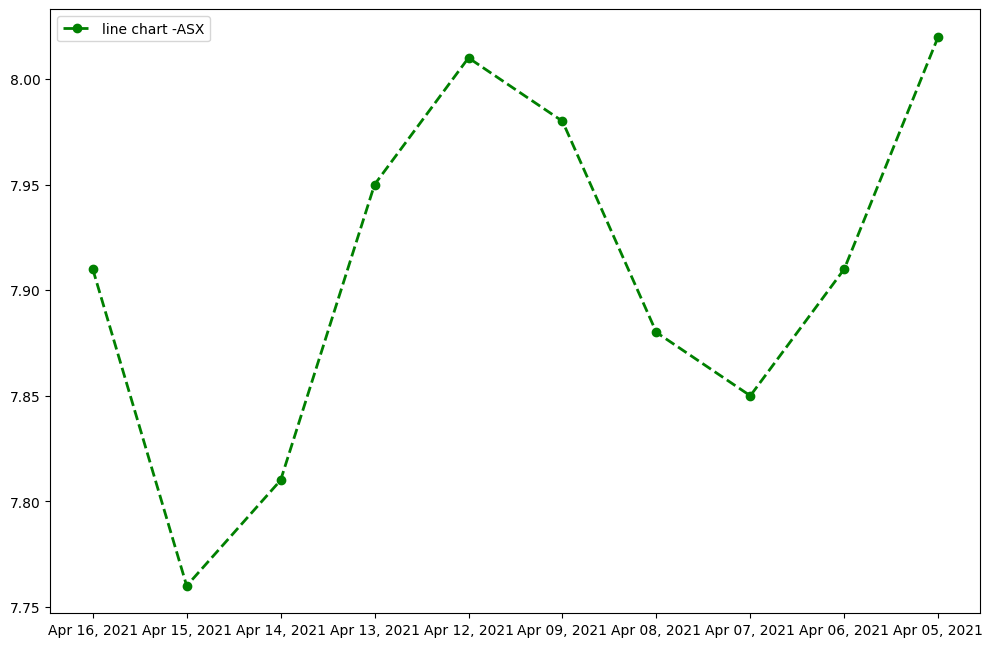

Created HTML File for MGI
Created MGI.csv
[7.06, 7.28, 6.88, 6.45, 6.46, 6.64, 7.41, 7.18, 7.18, 7.43]


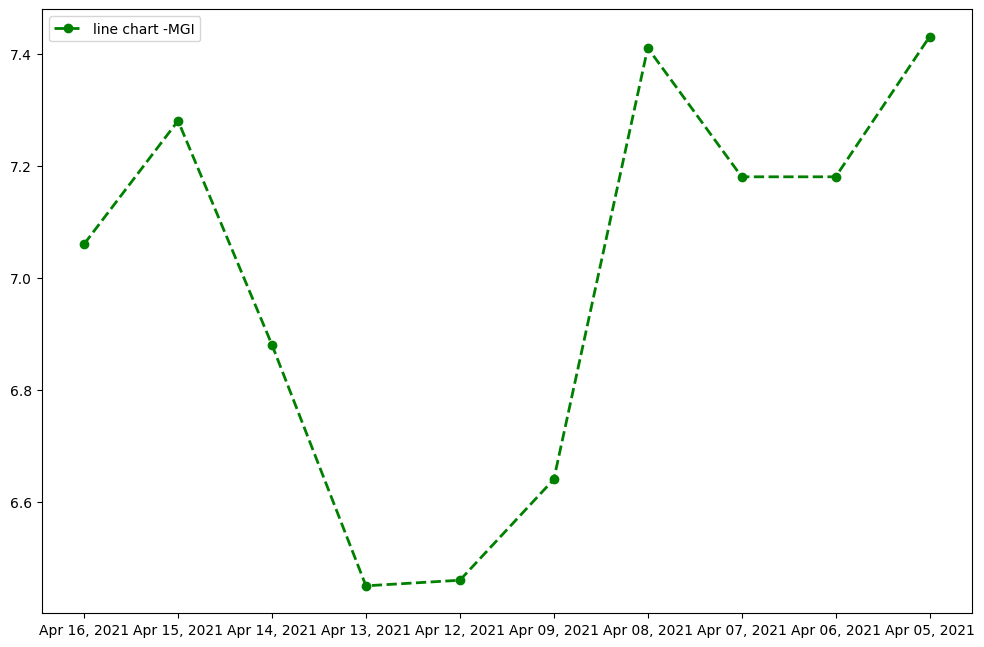

Created HTML File for EBON
Created EBON.csv
[4.35, 4.62, 5.18, 4.92, 5.16, 5.084, 5.19, 5.67, 5.23, 7.51]


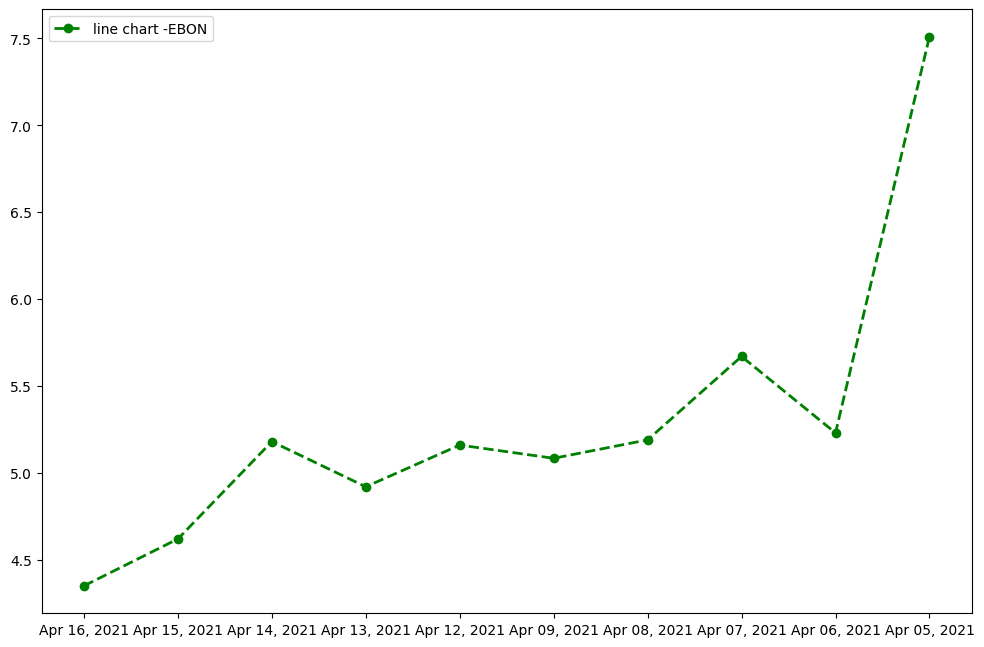

Created HTML File for GPX
Created GPX.csv
[16.61, 16.94, 17.56, 16.74, 16.77, 16.5, 16.48, 17.17, 17.33, 17.82]


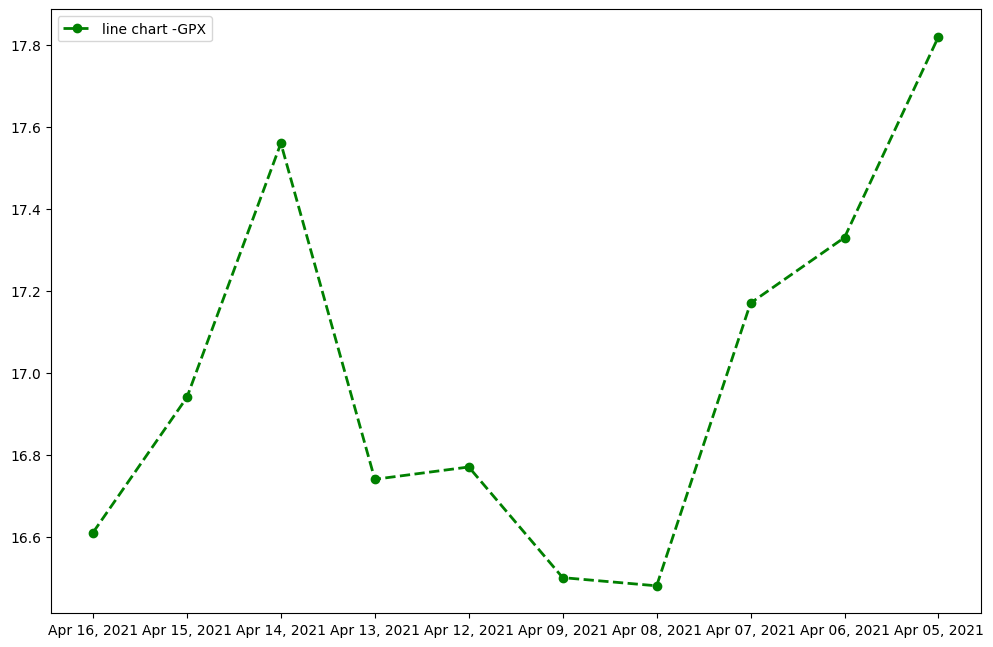

Created HTML File for VIPR
Created HTML File for VIPRF
Created VIPRF.csv
[0.479, 0.48, 0.506, 0.4973, 0.4261, 0.4727, 0.489, 0.4939, 0.5627, 0.5702]


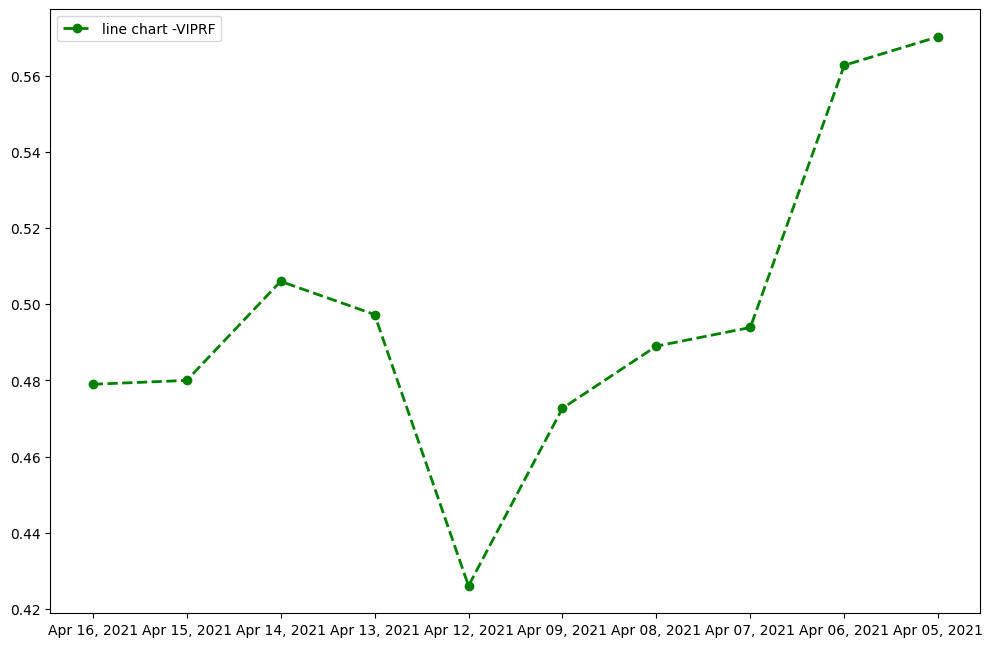

Created HTML File for GRAMF
Created GRAMF.csv
[7.33, 7.41, 7.94, 7.69, 8.01, 8.05, 7.77, 8.16, 7.75, 7.97]


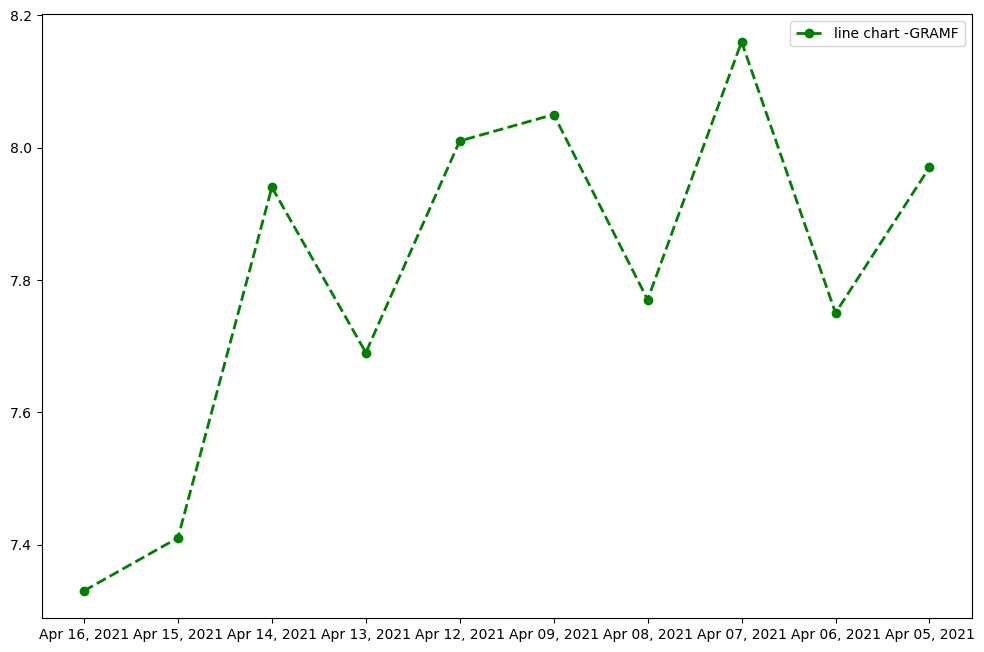

Created HTML File for GRMWF
Created GRMWF.csv
[1.85, 1.75, 1.888, 2.01, 1.53, 2.15, 2.0, 2.2, 2.14, 2.302]


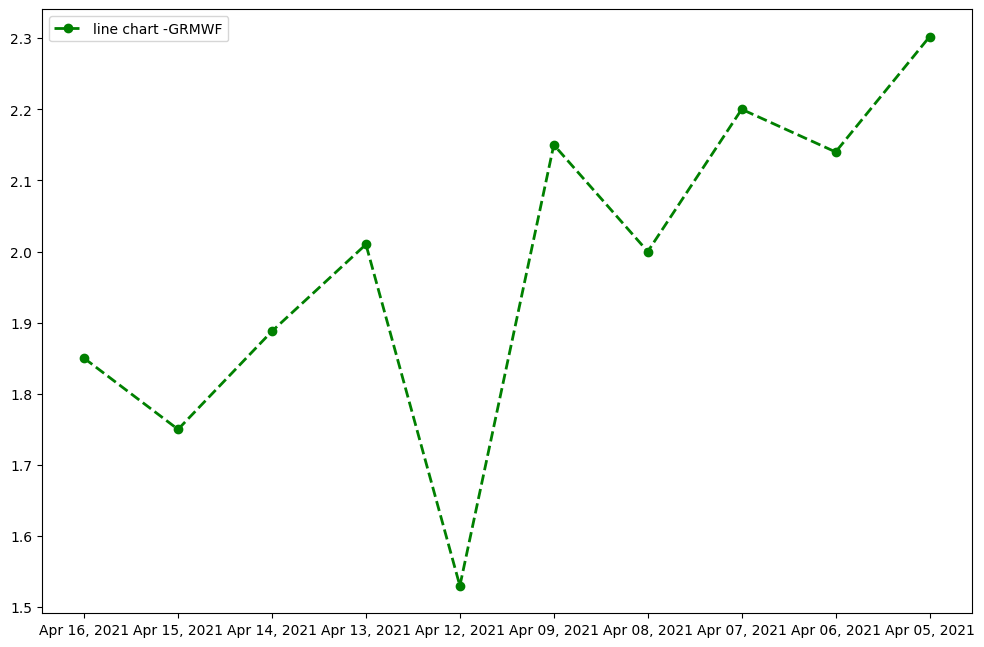

Created HTML File for BLL
Created BLL.csv
[91.14, 90.09, 90.49, 90.31, 89.86, 88.81, 86.78, 87.95, 87.07, 86.48]


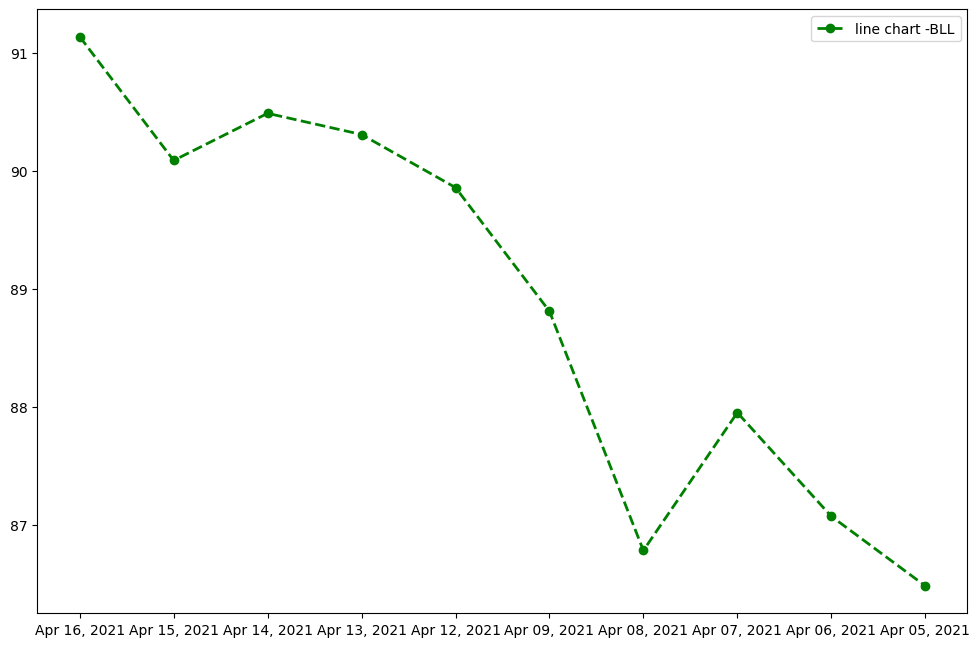

Created HTML File for NVST
Created NVST.csv
[42.0, 41.81, 41.82, 41.88, 41.84, 43.5, 43.4, 44.74, 41.76, 41.23]


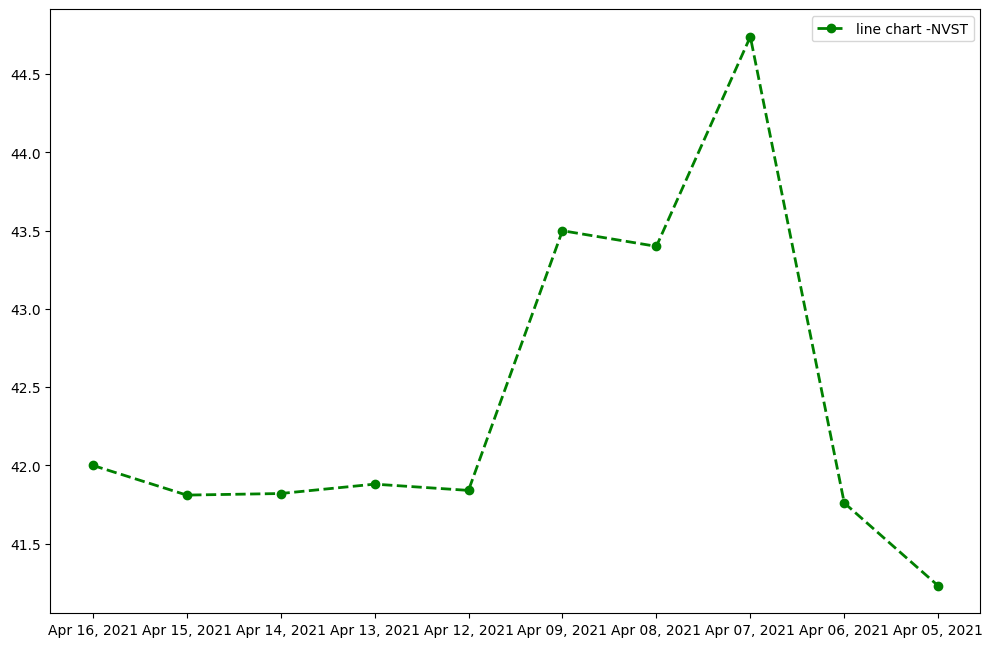

Created HTML File for IDCC
Created IDCC.csv
[73.65, 72.65, 71.86, 70.3, 0.35, 70.99, 72.73, 71.82, 71.03, 65.94]


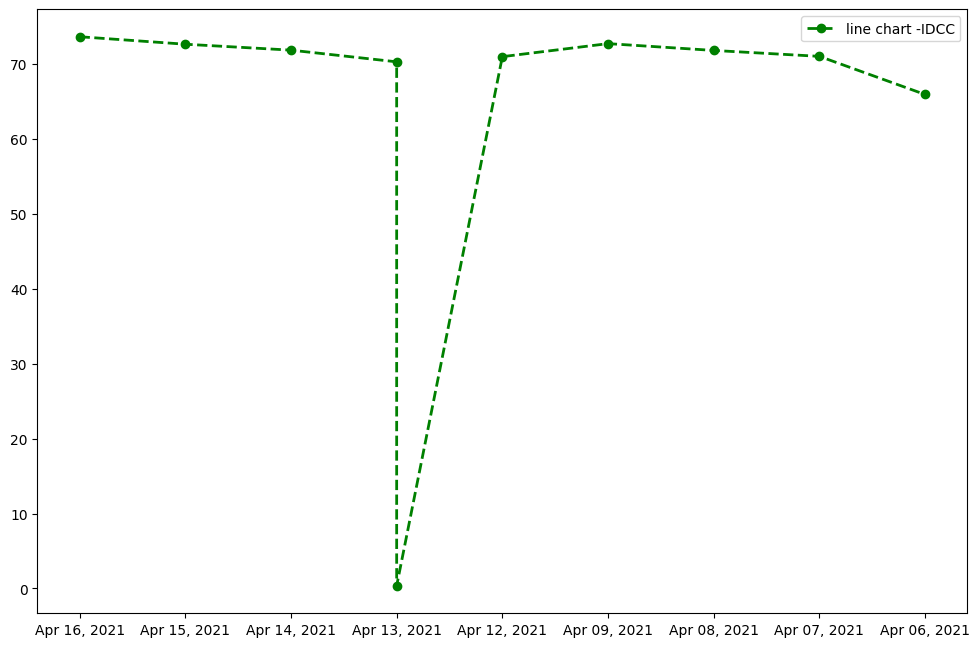

Created HTML File for KAVL
Created KAVL.csv
[1.71, 1.88, 2.12, 2.12, 2.6, 2.1, 1.65, 1.52, 1.46, 1.31]


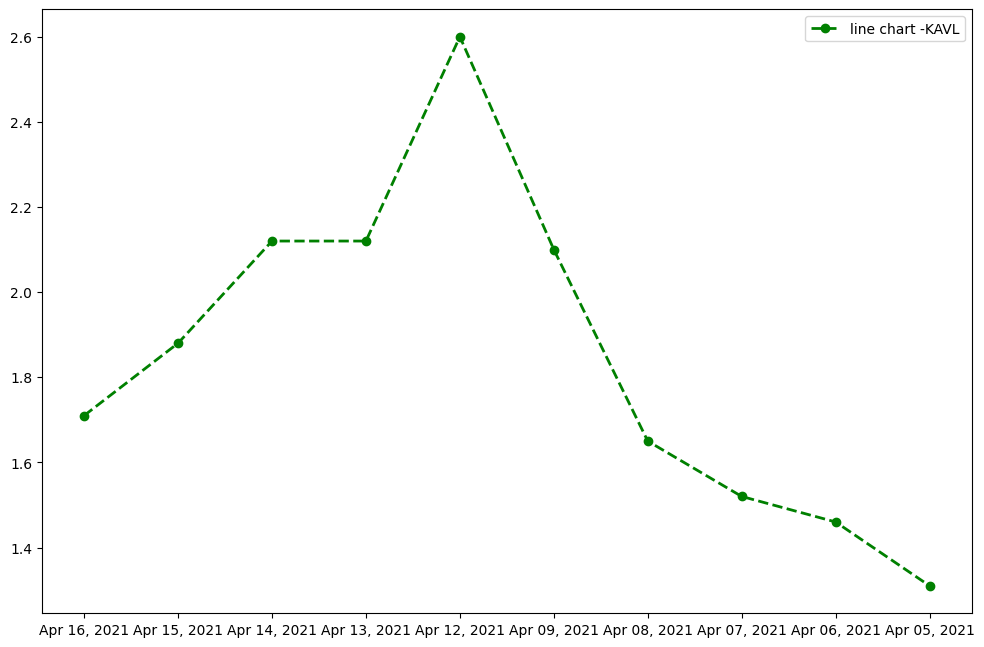

Created HTML File for PPL
Created PPL.csv
[29.1, 28.75, 28.6, 28.5, 28.75, 28.72, 28.98, 28.77, 28.81, 28.82]


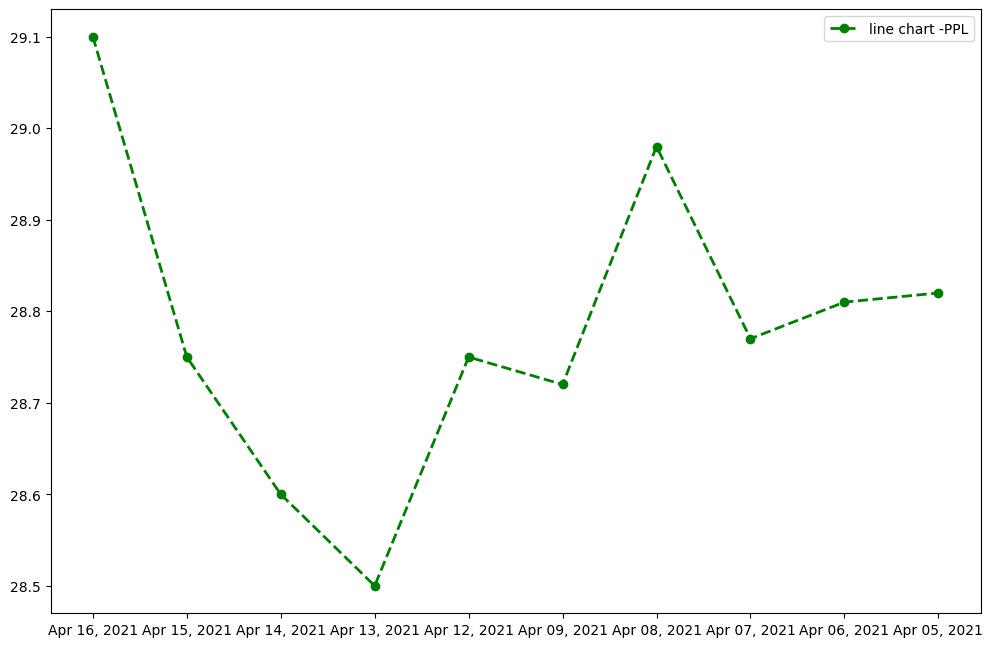

Created HTML File for PBA
Created PBA.csv
[29.8, 29.81, 29.3, 29.09, 29.28, 29.31, 29.26, 29.48, 29.36, 29.19]


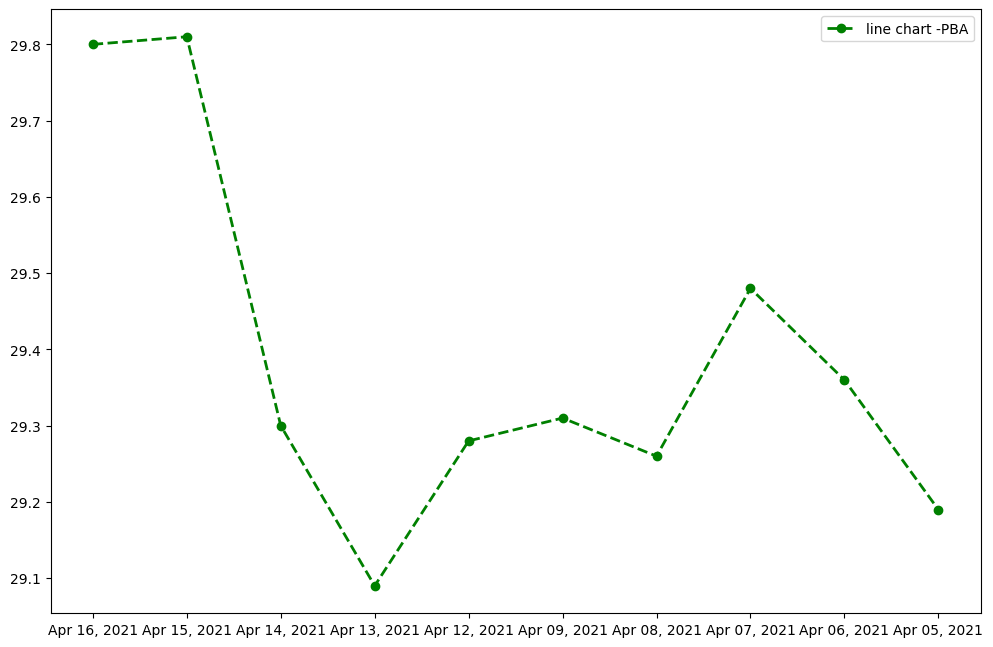

Created HTML File for WFG
Created WFG.csv
[84.03, 84.75, 82.23, 82.39, 80.09, 82.32, 80.12, 76.2, 75.52, 75.0]


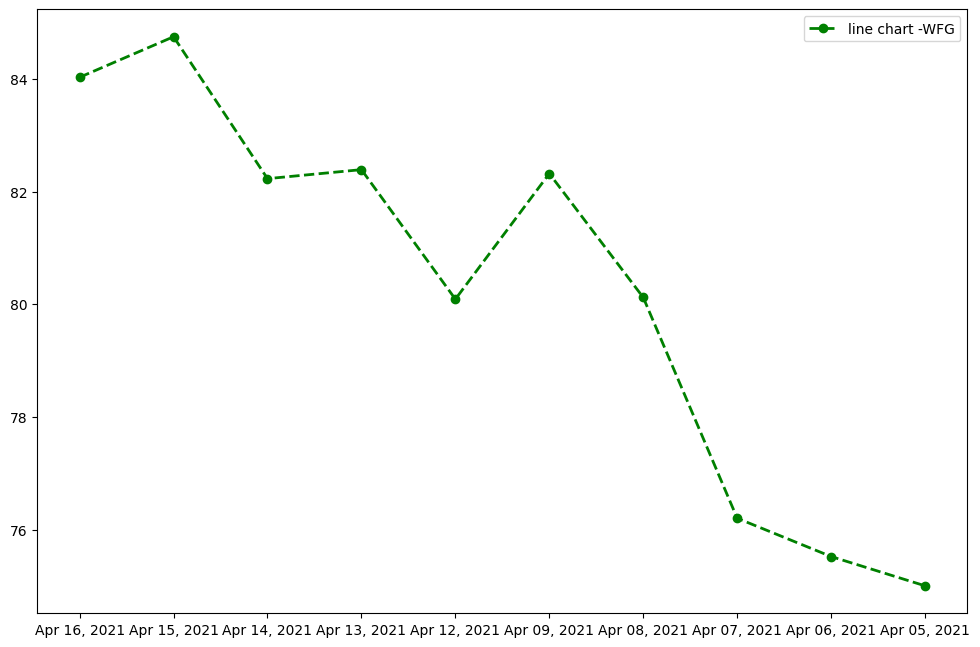

Created HTML File for RENN
Created RENN.csv
[8.26, 8.55, 8.23, 8.05, 8.29, 8.88, 8.12, 8.57, 8.92, 9.05]


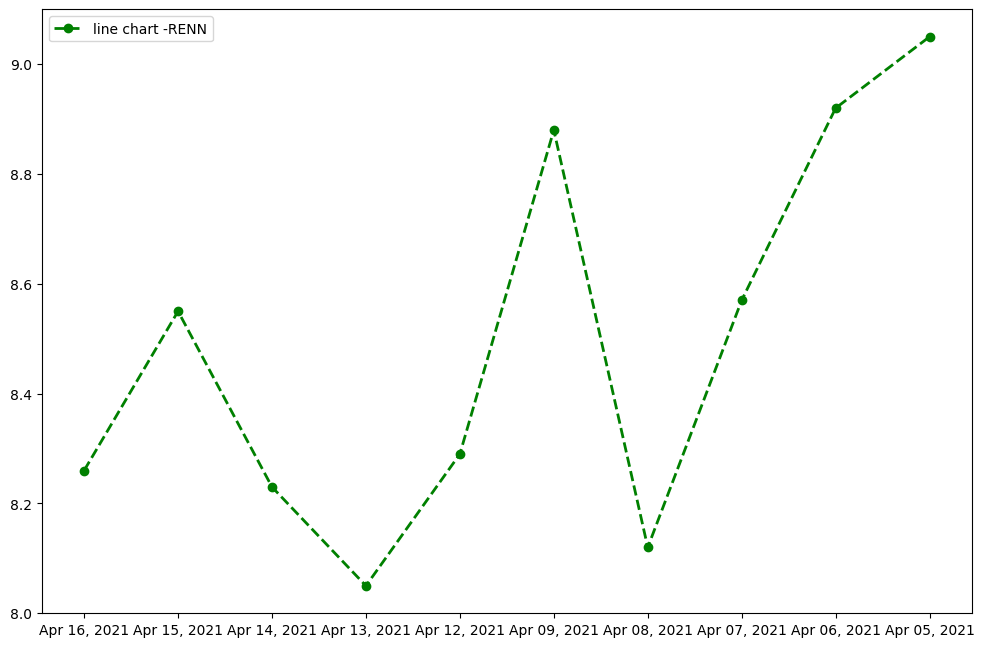

Created HTML File for AMH
Created AMH.csv
[34.67, 34.42, 34.59, 34.45, 34.19, 34.19, 34.27, 34.43, 33.66, 34.4]


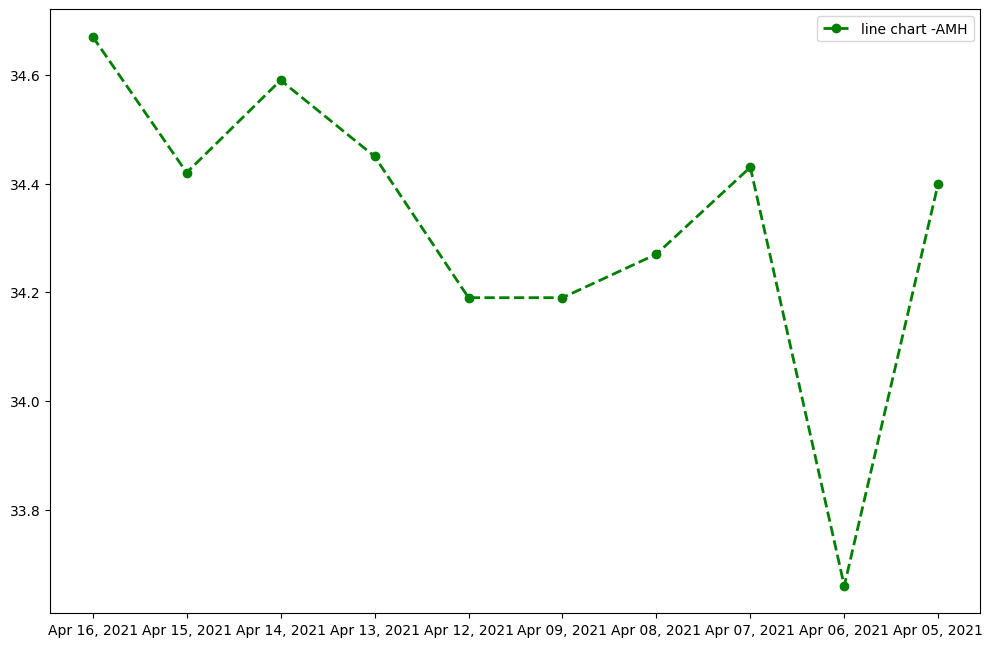

Created HTML File for RTX
Created RTX.csv
[78.59, 78.16, 78.0, 78.0, 78.25, 78.54, 77.13, 77.49, 77.59, 77.86]


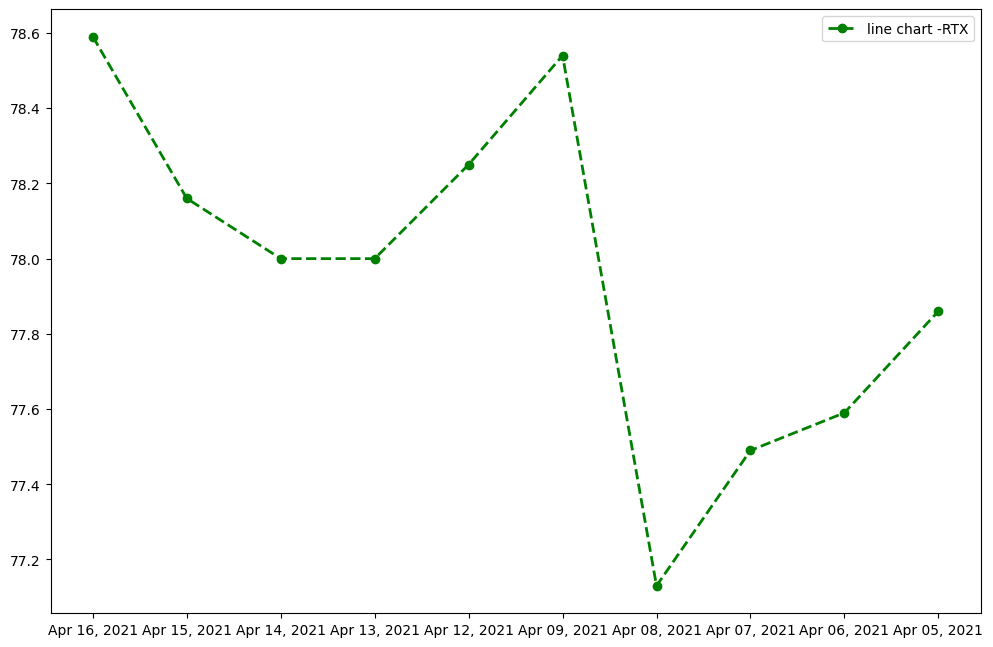

Created HTML File for AES
Created AES.csv
[28.78, 28.5, 28.13, 27.73, 27.69, 27.5, 27.26, 27.79, 27.26, 27.43]


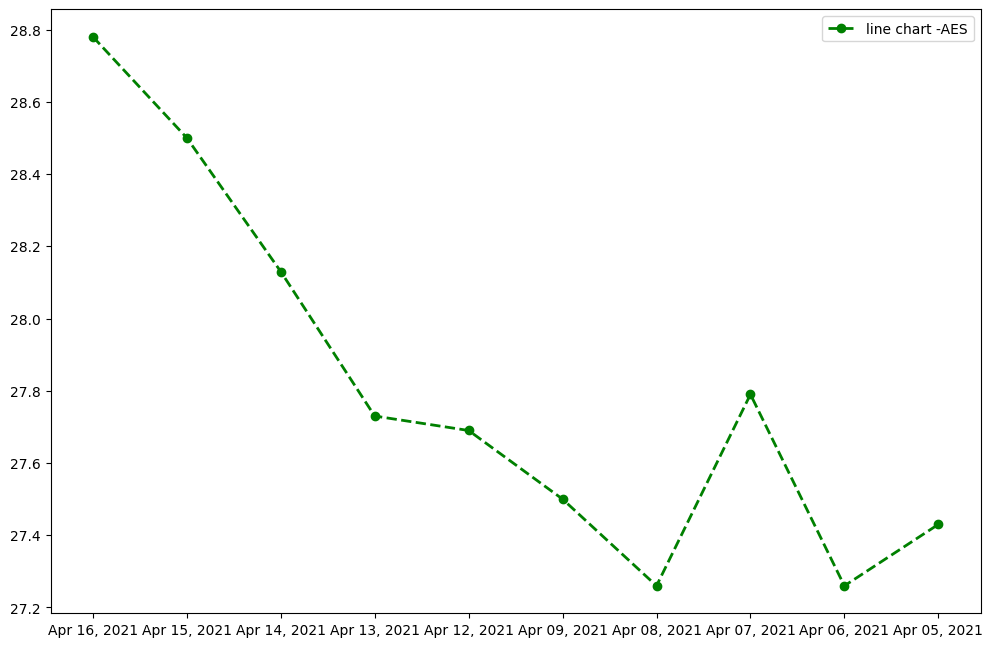

In [32]:
import os
import sys
import pandas as pd
import numpy as np
import re
import urllib
import csv
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
def fetch_stock_prices(stock_symbol_postfix):
  for stock_symbol in stock_symbol_postfix:
    yahoo_url = 'https://finance.yahoo.com/quote/'+stock_symbol+'/history?p='+stock_symbol
    yahoo_hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
          'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
          'Accept-Encoding': 'none',
          'Accept-Language': 'en-US,en;q=0.8',
          'Connection': 'keep-alive'}

    yahoo_UClient = uReq(urllib.request.Request(yahoo_url, headers=yahoo_hdr))
    yahoo_page = yahoo_UClient.read()
    yahoo_UClient.close()
    yahoo_page_soup = soup(yahoo_page, 'html.parser')
    table_from_page = yahoo_page_soup.select('table.W(100%).M(0)')
    if len(table_from_page)>1:
      html_str = table_from_page[1].prettify()
      Html_file= open(stock_symbol + ".html","w")
      Html_file.write(html_str)
      print("Created HTML File for " + stock_symbol)
      Html_file.close()
      save_to_csv(stock_symbol)

fetch_stock_prices(stock_symbol_postfix)

In [33]:
print(text_from_page)

 






 




 All News Releases and Press Releases from PR Newswire  
  
 






 



 











Resources
 
Blog


Journalists



Log In
 
Sign Up
 
Data Privacy


Send a Release
 















News


Products 



Overview


Distribution by PR Newswire


Cision Communications Cloud®


Cision IR


All Products




Contact 



General Inquiries


Request a Demo


Editorial Bureaus


Partnerships


Media Inquiries


Worldwide Offices







			var siteSearchProperties = '{"viewAllorglabelHtml":"Organizations <span>View all</span>","viewAllprodlabelHtml":null,"viewAllresourcelabelHtml":null,"newsReleasePrefix":null,"viewAllNewslabelHtml":null}';
			siteSearchProperties = JSON.parse(siteSearchProperties);
		



Search









 









Search
When typing in this field, a list of search results will appear and be automatically updated as you type.














Searching for your content...











No results found. Please change your search terms and try again.


 














